# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):
        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):
                inputs = X_train[i]
                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)
                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias += learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)
                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print(f'epoch: {epoch} | train error: {train_error_acum} | val error: {val_error_acum}')

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [ ]:

# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000
N_inputs = 2

# Generar datos de entrada y salida para la puerta AND
X_data = np.random.randint(2, size=(N_samples, N_inputs))
Y_data = np.logical_and(X_data[:, 0], X_data[:, 1]).astype(int)

# Dividir los datos en entrenamiento y validación
train_size = 5000
val_size = 500
test_size = N_samples - train_size - val_size

X_train = X_data[:train_size]
Y_train = Y_data[:train_size]
X_validation = X_data[train_size:train_size + val_size]
Y_validation = Y_data[train_size:train_size + val_size]
X_test = X_data[train_size + val_size:]
Y_test = Y_data[train_size + val_size:]


# Visualizar algunas muestras
print("X_train (first 5 samples):")
print(X_train[:5])
print("Y_train (first 5 samples):")
print(Y_train[:5])

X_train (first 5 samples):
[[1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]]
Y_train (first 5 samples):
[0 1 0 0 0]


In [ ]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.03597185633537368 | val error: 0.007204746663656712
epoch: 10 | train error: 0.00048506744614666247 | val error: 0.0004144564743277782
epoch: 20 | train error: 0.00023249896760297873 | val error: 0.00020454987422859687
epoch: 30 | train error: 0.00015163653875518166 | val error: 0.00013483054874720556
epoch: 40 | train error: 0.00011214749631039284 | val error: 0.00010027601214570787
epoch: 50 | train error: 8.883154007995719e-05 | val error: 7.970407427632032e-05
epoch: 60 | train error: 7.34713223942004e-05 | val error: 6.607872665053541e-05
epoch: 70 | train error: 6.260112991866412e-05 | val error: 5.639974874582908e-05
epoch: 80 | train error: 5.450955820799637e-05 | val error: 4.917454873096385e-05
epoch: 90 | train error: 4.8255367715670946e-05 | val error: 4.357776180469497e-05


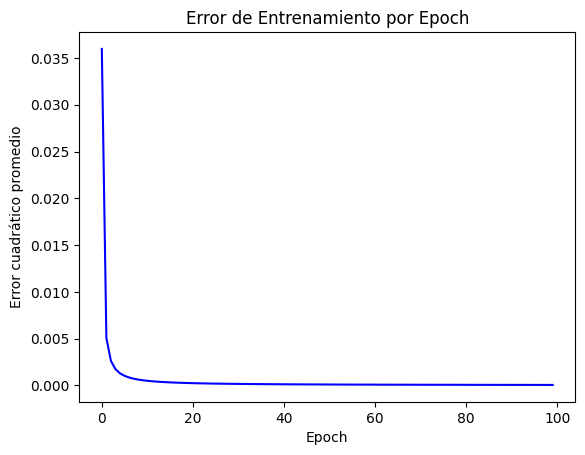

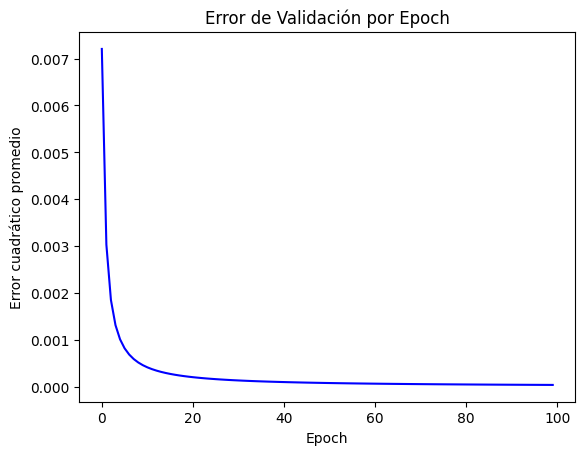

In [ ]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [ ]:
# Obtener las métricas de test del modelo

## generar las predicciones
X_test = X_data[train_size + N_validation:]
Y_test = Y_data[train_size + N_validation:]

Y_pred = np.round([perceptron_and.predict(x) for x in X_test])



Matriz de confusión:
[[1]]


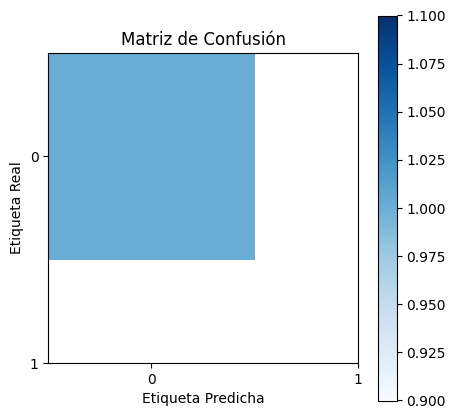

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print("Matriz de confusión:")
print(cm)

plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()